## Exploratory Data Analysis (EDA)

In [ ]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

# Importing data
dataset = load_dataset('ai_job_dataset1.csv')
df = dataset['train'].to_pandas()

#Cleaning data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills)

In [3]:
df.head(6)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."


### Top 10 jobs in the Data Industry (all countries)

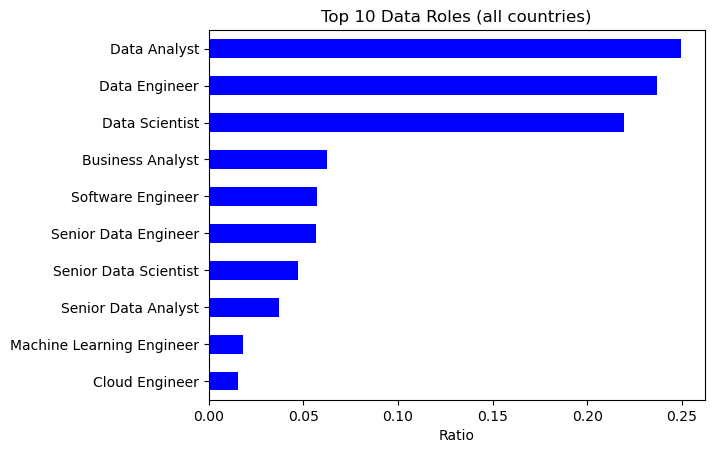

In [4]:
total_data_jobs = df['job_title_short'].count()
(df['job_title_short'].value_counts().head(10)/total_data_jobs).plot(kind='barh', color="blue")

plt.title("Top 10 Data Roles (all countries)")
plt.xlabel("Ratio")
plt.ylabel("")

ax = plt.gca()
ax.invert_yaxis()

plt.savefig('images/01_Top_10_Data_Roles.png', bbox_inches='tight')
plt.show()

### Top 10 Countries with Highest Number of Total Data Job Offers

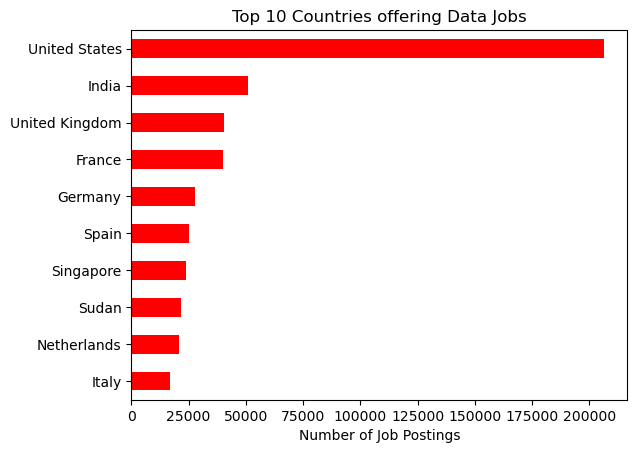

In [5]:
(df['job_country'].value_counts().head(10)).plot(kind='barh', color="red")

plt.title("Top 10 Countries offering Data Jobs")
plt.xlabel("Number of Job Postings")
plt.ylabel("")

ax = plt.gca()
ax.invert_yaxis()

plt.savefig('images/01_Top_10_Countries.png', bbox_inches='tight')
plt.show()

### Percentage of Remote Data Jobs

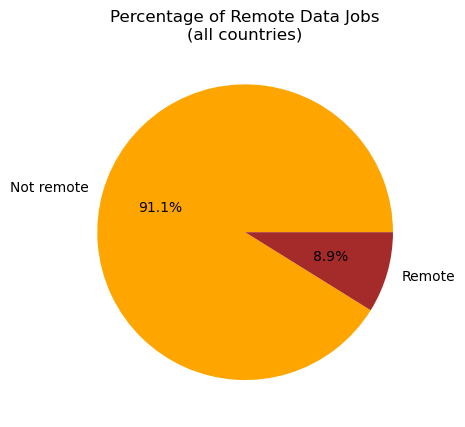

In [6]:
df['job_work_from_home'].value_counts().plot(kind='pie', labels = ["Not remote", "Remote"], colors=['orange','brown'], autopct='%1.1f%%')
plt.ylabel('')
plt.title("Percentage of Remote Data Jobs\n(all countries)")
plt.savefig('images/01_Remote_jobs_pie.png', bbox_inches='tight')
plt.show()

### Percentage of jobs with provided healthcare

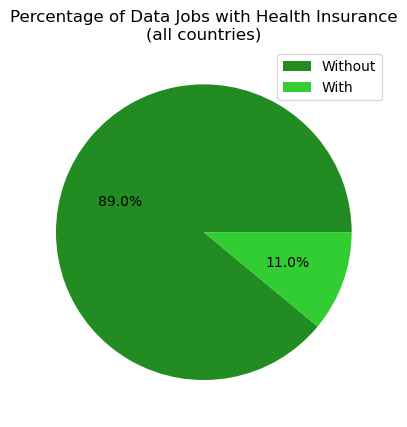

In [7]:
df['job_health_insurance'].value_counts().plot(kind='pie', labels=['',''], colors=['forestgreen','limegreen'], autopct='%1.1f%%')
plt.legend(labels = ['Without','With'])
plt.ylabel('')
plt.title("Percentage of Data Jobs with Health Insurance\n(all countries)")
plt.savefig('images/01_Health_insurance_jobs_pie.png', bbox_inches='tight')
plt.show()

### Top 10 Data roles in Croatia

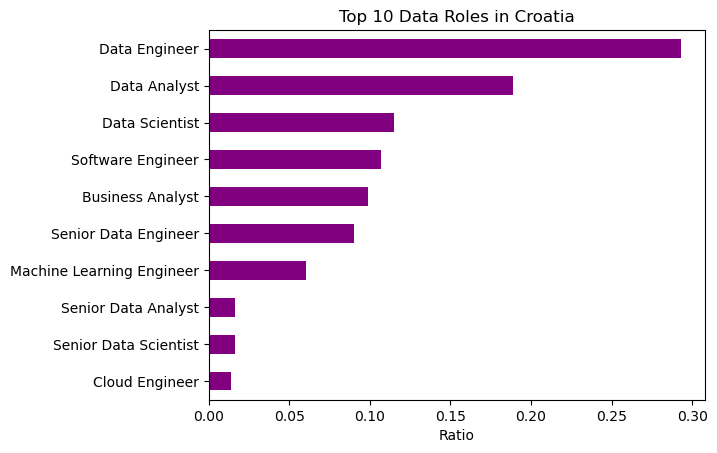

In [8]:
df_croatia = df[df['job_country']=="Croatia"].copy()
total_data_jobs_croatia = df_croatia['job_title_short'].count()
(df_croatia['job_title_short'].value_counts().head(10)/total_data_jobs_croatia).plot(kind='barh', color="purple")

plt.title("Top 10 Data Roles in Croatia")
plt.xlabel("Ratio")
plt.ylabel("")

ax = plt.gca()
ax.invert_yaxis()

plt.savefig('images/01_Top_10_Data_Roles_Croatia.png', bbox_inches='tight')
plt.show()

### Top 10 Data skills 

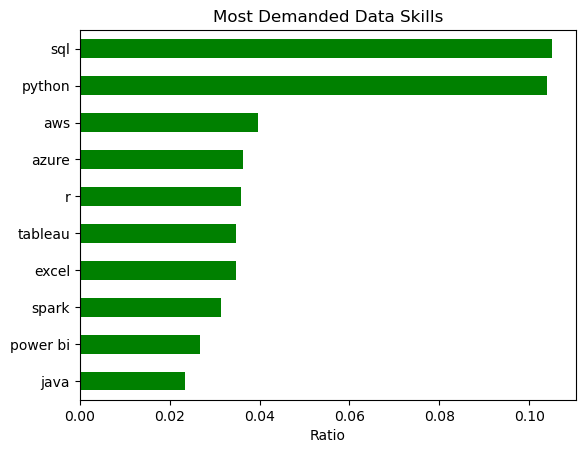

In [10]:
df_skills = df.explode('job_skills')
total_skills_number = df_skills['job_skills'].count()
(df_skills['job_skills'].value_counts()/total_skills_number).head(10).plot(kind='barh', color="green")
plt.title("Most Demanded Data Skills")
plt.xlabel("Ratio")
plt.ylabel('')
ax = plt.gca()
ax.invert_yaxis()

plt.savefig('images/01_Most_Demanded_Data_Skills_Overall.png', bbox_inches='tight')
plt.show()

##### Having a general idea of the findings in this EDA section, let us focus on our inquiries individually and more concisely in the subsequent Notebooks.